# Лабораторная работа 2
## Алгоритмы сортировки
### Филиппов Константин 
### 16 вариант ИУ10-36

# Алгоритмы сортировки

### Цель работы:

Изучение основных алгоритмов на сортировки.

### Постановка задачи:

1. Провести классификацию алгоритмов сортировки.
2. Подготовить теоретическое описание алгоритмов сортировки согласно номеру индивидуального варианта.
3. Подготовить блок-схему алгоритмов.
4. Представить описание алгоритмов на псевдокоде.
5. Описать достоинства и недостатки каждого алгоритма.
6. Реализовать алгоритмы сортировки согласно номеру индивидуального варианта.
7. Протестировать корректность реализации алгоритма
8. Провести ручную трассировку алгоритма.
9. Провести сравнение указанных алгоритмов сортировки массивов, содержащих n1, n2, n3, n4 элементов.
10. Каждую функцию сортировки вызывать трижды: для сортировки упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива. Сортируемая последовательность для всех методов должна быть одинаковой (сортировать копии одного массива).
11. Проиллюстрировать эффективность алгоритмов сортировок по заданному критерию. Построить диаграммы указанных зависимостей.

### Словесная постановка задачи:

Задача состоит в реализации двух алгоритмов сортировки: блинной сортировки и сортировки слиянием, а также в сравнении их производительности на массивах целых чисел различного размера: 1000, 5000, 10000 и 100000 элементов. Входными данными являются массивы чисел в трех исходных состояниях: упорядоченный массив, массив, отсортированный в обратном порядке, и случайно неупорядоченный массив. Алгоритмы должны отсортировать массивы в порядке возрастания.

Результатами работы должны стать отсортированные массивы для каждого алгоритма и замеры времени выполнения сортировки на каждом из массивов. Также требуется проанализировать количество операций сравнения и перемещений, чтобы оценить временную сложность каждого алгоритма на различных типах данных.

Основными переменными задачи являются размеры массивов, тип их исходной структуры и алгоритмы сортировки. Выходными данными являются отсортированные массивы и данные о времени их обработки. Ограничения включают требование к объему оперативной памяти для сортировки слиянием, которая использует дополнительную память для копирования массивов. Кроме того, время выполнения алгоритмов на больших массивах не должно быть чрезмерно долгим.

Задача имеет решение для всех корректных входных данных (массивов чисел), и оба алгоритма должны завершиться корректно. В случае пустого массива результатом сразу будет пустой массив. Ожидается, что результат работы позволит определить, какой из алгоритмов более эффективен для различных типов массивов, а также проиллюстрирует зависимость времени выполнения от структуры и размера входных данных.

---


# Классификация алгоритмов сортировки

- Устойчивость
- Место хранения данных
- Выделение дополнительного места
- Адаптивность
- Сложность

![img_2.png](attachment:img_2.png)

# Описание алгоритмов для 16го варианта

1.	Блинная сортировка:
- Cуть: Сортировка путем переворотов частей массива.
- Процесс: Найти максимальный элемент, перевернуть до него, затем перевернуть весь неотсортированный сегмент. Повторять, уменьшая размер.
- Сложность: $O(n^2)$.
- Память: Сортировка на месте.
- Плюсы: Устойчивая, простая, без доп. памяти.
- Минусы: Медленная для больших данных, неадаптивна.
2. Сортировка слиянием:
- Суть: Разделение массива и слияние отсортированных частей.
- Процесс: Разделить массив на две части, резать дальше, сравнивать и объединять.
- Сложность:  $O(n log n)$.
- Память: Требует дополнительную память.
- Плюсы: Эффективная, устойчивая.
- Минусы: Требует доп. памяти, неадаптивна.

# Псевдокод

## Блинная сортировка

## Сортировка слиянием

# Реализация на Python

In [1]:
# Блинная сортировка

def reverse(arr, k):
    start = 0
    while start < k:
        arr[start], arr[k] = arr[k], arr[start]
        start += 1
        k -= 1

def find_max(arr, n):
    max_index = 0
    for i in range(1, n + 1):
        if arr[i] > arr[max_index]:
            max_index = i
    return max_index

def pancake_sort(arr):
    n = len(arr)
    for i in range(n - 1, 0, -1):
        max_index = find_max(arr, i)
        if max_index != i:
            reverse(arr, max_index)
            reverse(arr, i)

In [2]:
# Сортировка слиянием

def merge(left, right):
    merged = []
    left_index, right_index = 0, 0
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1
    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1
    return merged

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    return merge(left_half, right_half) 

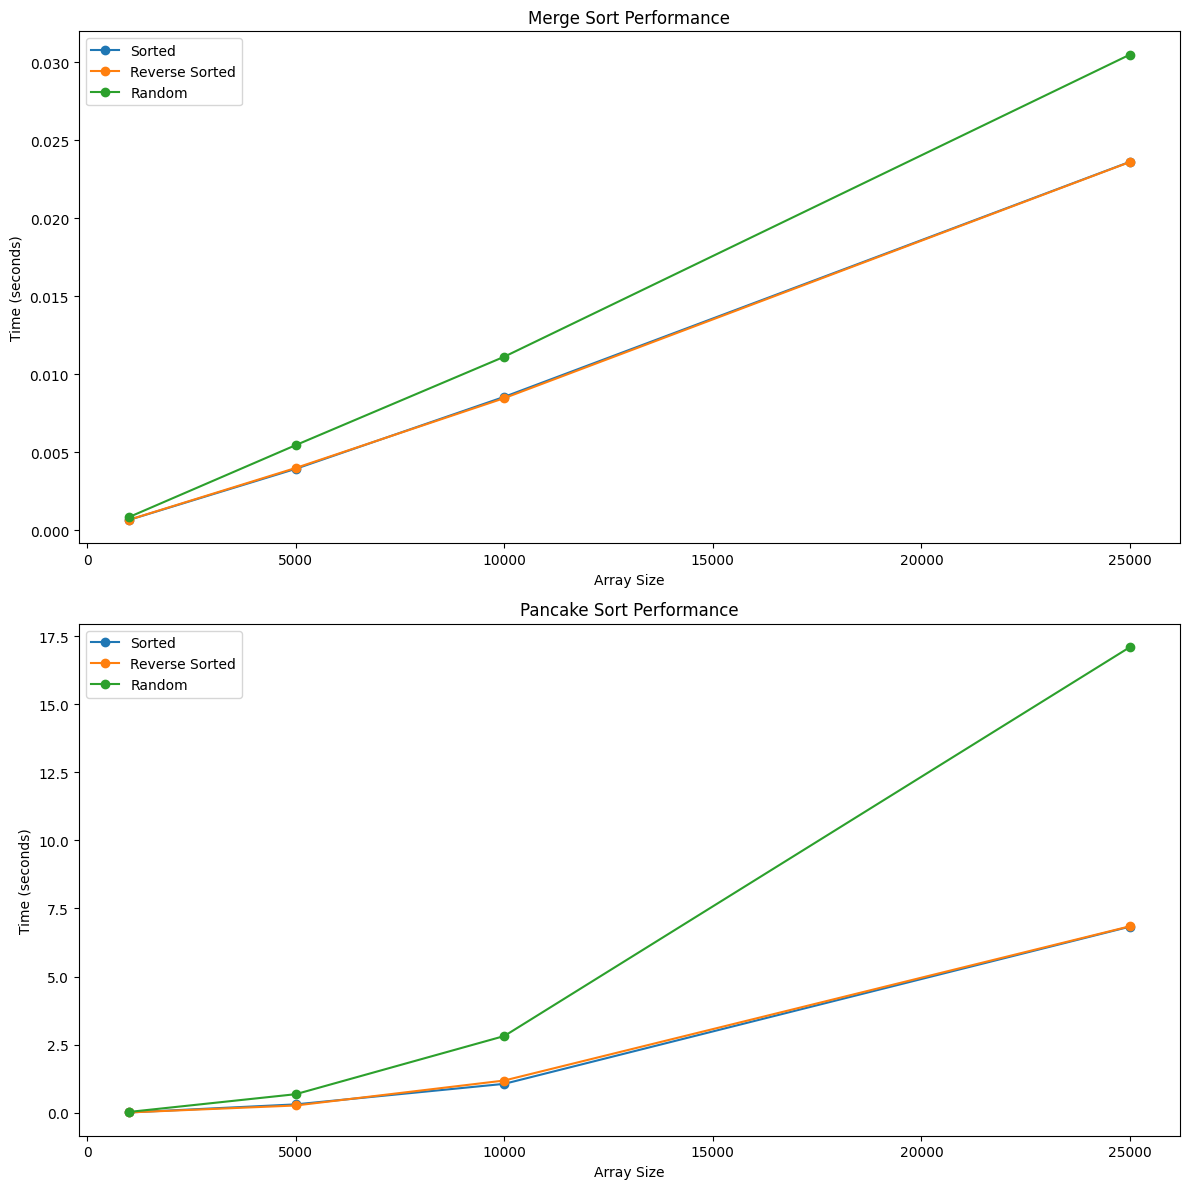

In [3]:
# variant 16

import time
import random
import matplotlib.pyplot as plt

sizes = [1000, 5000, 10000, 25000]
results = {
    'Merge Sort': {'Sorted': [], 'Reverse Sorted': [], 'Random': []},
    'Pancake Sort': {'Sorted': [], 'Reverse Sorted': [], 'Random': []}
}

def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    return time.time() - start_time

def create_results(name, function, arrays):
    global results
    for key, arr in arrays.items():
        results[name][key].append(measure_time(function, arr))

for n in sizes:
    arrays = {
        'Sorted': list(range(n)), 
        'Reverse Sorted': list(range(n, 0, -1)), 
        'Random': random.sample(range(n), n)
    }

    create_results('Merge Sort', merge_sort, arrays)
    create_results('Pancake Sort', pancake_sort, arrays)

def plot_results(results):
    fig, ax = plt.subplots(2, 1, figsize=(12, 12))

    ax[0].plot(sizes, results['Merge Sort']['Sorted'], label='Sorted', marker='o')
    ax[0].plot(sizes, results['Merge Sort']['Reverse Sorted'], label='Reverse Sorted', marker='o')
    ax[0].plot(sizes, results['Merge Sort']['Random'], label='Random', marker='o')
    ax[0].set_title('Merge Sort Performance')
    ax[0].set_xlabel('Array Size')
    ax[0].set_ylabel('Time (seconds)')
    ax[0].legend()

    ax[1].plot(sizes, results['Pancake Sort']['Sorted'], label='Sorted', marker='o')
    ax[1].plot(sizes, results['Pancake Sort']['Reverse Sorted'], label='Reverse Sorted', marker='o')
    ax[1].plot(sizes, results['Pancake Sort']['Random'], label='Random', marker='o')
    ax[1].set_title('Pancake Sort Performance')
    ax[1].set_xlabel('Array Size')
    ax[1].set_ylabel('Time (seconds)')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_results(results)

---
# Вывод

В ходе лабораторной работы были реализованы и проанализированы алгоритмы сортировки: блинная сортировка и сортировка слиянием. Оба алгоритма тестировались на массивах различных размеров (1000, 5000, 10000 и 25000 элементов) в упорядоченном (возрастающе и убываюче) и неупорядоченном.

Основные результаты:

1.	Эффективность:
Сортировка слиянием показала стабильное время выполнения с временной сложностью $O(n \log n)$, особенно на больших массивах.
Блинная сортировка оказалась менее эффективной, с худшей временной сложностью $O(n^2)$.
2. Устойчивость:
Сортировка слиянием является устойчивым алгоритмом, сохраняющим порядок равных элементов, в то время как блинная сортировка — нет.
3. Адаптивность:
Оба алгоритма не являются адаптивными и требуют полной обработки массива независимо от его состояния.

Заключение:

Для сортировки больших массивов предпочтительнее использовать сортировку слиянием из-за её высокой эффективности и устойчивости. Блинная сортировка может быть полезна для обучения, но не подходит для реальных задач с большими данными.

---
# Контрольные вопросы

1. **В чем состоит суть метода сортировки вставками?**  
Сортировка вставками заключается в построении отсортированного массива путем последовательного добавления элементов из неотсортированной части. Каждый элемент вставляется на свое место в отсортированной части.

2. **Какие шаги выполняет алгоритм сортировки вставками?**  
Алгоритм проходит по массиву, начиная со второго элемента, и для каждого элемента выполняет сравнение с предыдущими элементами, сдвигая их вправо, если они больше текущего элемента, пока не найдет правильное место для вставки.

3. **Как программно реализуется сортировка вставками?**  
Сортировка вставками реализуется с помощью вложенных циклов: внешний цикл проходит по массиву, а внутренний сдвигает элементы, которые больше текущего, и вставляет его на правильную позицию.

4. **В чем достоинства и недостатки метода сортировки вставками?**  
Достоинства метода включают простоту реализации, небольшие затраты памяти и высокую эффективность на почти отсортированных данных (временная сложность $O(n)$). Недостатки — неэффективность на больших объемах данных, так как средняя и худшая временные сложности составляют $O(n^2)$.

5. **Приведите практический пример сортировки массива методом вставок.**  
Для массива [5, 2, 9, 1] алгоритм будет последовательно сравнивать 2 с 5 и вставлять его перед, затем 9 останется на месте, а 1 будет вставлен в самое начало, в результате чего получим [1, 2, 5, 9].

6. **В чем состоит суть сортировки методом Шелла?**  
Сортировка методом Шелла — это обобщение сортировки вставками, которое использует концепцию "шага", позволяя сравнивать и сортировать элементы на расстоянии, что значительно уменьшает количество необходимых перестановок.

7. **За счет чего метод Шелла дает лучшие показатели по сравнению с простейшими методами?**  
Метод Шелла показывает лучшие результаты за счет сокращения расстояния между сравниваемыми элементами. Это позволяет быстро "приблизить" элементы к их окончательным позициям.

8. **Приведите практический пример сортировки массива методом Шелла.**  
Для массива [5, 2, 9, 1] с шагом 2 сначала будут сортироваться элементы 5 и 9, затем 2 и 1, в результате мы сможем сократить количество перемещений и быстрее добиться сортировки.

9. **Какой фактор оказывает наибольшее влияние на эффективность сортировки методом Шелла?**  
На эффективность метода Шелла наиболее сильно влияет выбор последовательности шагов, так как это определяет, насколько быстро элементы смогут приблизиться к своим окончательным позициям.

10. **Какие последовательности шагов группировки рекомендуются для практического использования в методе Шелла?**  
Рекомендуются последовательности, основанные на степенях 2 (например, 1, 2, 4) или последовательности Седжвика, которые хорошо сбалансированы и обеспечивают эффективное уменьшение шагов.

11. **Как программно реализуется сортировка методом Шелла?**  
Сортировка реализуется с использованием внешнего цикла для шага и внутреннего цикла для вставки, где элементы сравниваются с учетом заданного шага, что позволяет пропускать элементы.

12. **В чем состоит суть метода сортировки выбором?**  
Метод сортировки выбором состоит в том, что он находит минимальный элемент из неотсортированной части массива и перемещает его в начало неотсортированной части, тем самым постепенно формируя отсортированный массив.

13. **Какие шаги выполняет алгоритм сортировки выбором?**  
Алгоритм включает проход по неотсортированной части массива для поиска минимального элемента и затем обмен этого элемента с первым неотсортированным.

14. **Как программно реализуется сортировка выбором?**  
Программная реализация включает два вложенных цикла: внешний цикл для итерации по элементам, а внутренний для поиска минимального элемента и его перестановки.

15. **В чем достоинства и недостатки метода сортировки выбором?**  
Достоинства метода включают простоту и стабильную временную сложность $O(n^2)$, что делает его предсказуемым. Недостатки заключаются в неэффективности на больших данных, поскольку он требует много сравнений и перестановок.

16. **Приведите практический пример сортировки массива методом выбора.**  
Для массива [5, 2, 9, 1] на первом шаге алгоритм найдет 1 как минимальный элемент и поместит его на первое место, затем для оставшихся элементов [5, 2, 9] найдет 2 и поместит его на второе место, в итоге получим [1, 2, 5, 9].

17. **В чем состоит суть метода сортировки обменом?**  
Сортировка обменом (или пузырьком) состоит в сравнении каждой пары соседних элементов и их обмене, если они расположены в неправильном порядке.

18. **Какие шаги выполняет алгоритм сортировки обменом?**  
Алгоритм проходит по массиву, сравнивает соседние элементы и меняет их местами, если они не отсортированы. Процесс повторяется до тех пор, пока не останется ненужных обменов.

19. **Как программно реализуется сортировка обменом?**  
Реализация включает два вложенных цикла: внешний для прохода по массиву и внутренний для сравнения и обмена соседних элементов.

20. **В чем достоинства и недостатки метода сортировки обменом?**  
Достоинства метода включают простоту и понятность алгоритма. Недостатки — низкая эффективность на больших данных с временной сложностью $O(n^2)$ и большое количество неэффективных перестановок.

21. **Приведите практический пример сортировки массива методом обмена.**  
Для массива [5, 2, 9, 1] последовательные сравнения приведут к перемещению 1 в начало, затем 2, пока массив не будет отсортирован: [1, 2, 5, 9].

22. **В чем состоит суть метода быстрой сортировки?**  
Быстрая сортировка основана на принципе "разделяй и властвуй", где массив делится на подмассивы по опорному элементу, и затем каждый подмассив сортируется рекурсивно.

23. **За счет чего метод быстрой сортировки дает лучшие показатели по сравнению с простейшими методами?**  
Метод быстрой сортировки обеспечивает лучшую производительность благодаря эффективному делению массива, что в среднем дает временную сложность $O(n \log n)$, значительно быстрее, чем методы с $O(n^2)$.

24. **Что такое опорный элемент в методе быстрой сортировки и как он используется?**  
Опорный элемент — это элемент массива, вокруг которого происходит разделение. Все элементы меньше него помещаются слева, а больше — справа, что позволяет структурировать данные.

25. **Приведите практический пример быстрой сортировки массива.**  
Для массива [5, 2, 9, 1] опорным элементом может быть 5. После первой итерации массив будет разбит на [2, 1] и [9], затем каждый подмассив будет сортироваться рекурсивно.

26. **Что можно сказать о применимости метода быстрой сортировки с точки зрения его эффективности?**  
Быстрая сортировка является одним из самых эффективных алгоритмов для сортировки больших массивов, особенно в среднем случае. Однако в худшем случае может деградировать до $O(n^2)$.

27. **Какой фактор оказывает решающее влияние на эффективность метода быстрой сортировки?**  
Решающее влияние оказывает выбор опорного элемента, так как плохой выбор может привести к неэффективному разделению массива и увеличению числа итераций.

28. **Почему выбор серединного элемента в качестве опорного в методе быстрой сортировки может резко ухудшать эффективность метода?**  
Выбор серединного элемента в уже отсортированном массиве может привести к сильно несбалансированным подмассивам, что увеличивает количество необходимых сравнений.

29. **Какое правило выбора опорного элемента в методе быстрой сортировки является наилучшим и почему его сложно использовать?**  
Наилучшим считается выбор медианы, однако его сложно реализовать, так как требует дополнительной обработки для нахождения медианы в массиве.

30. **Какое простое правило выбора опорного элемента в методе быстрой сортировки рекомендуется использовать на практике?**  
Рекомендуется использовать первый или последний элемент массива, так как это просто реализуется и часто обеспечивает приемлемую производительность.

31. **Какие усовершенствования имеет базовый алгоритм метода быстрой сортировки?**  
Усовершенствования могут включать использование медианы для выбора опорного элемента и уменьшение глубины рекурсии для повышения производительности.
32. Рекурсивная структура алгоритма быстрой сортировки отражает естественное разбиение задачи на подзадачи: выбор опорного элемента, разделение массива на две части и рекурсивная сортировка каждой из них.

33. **Как реализовать рекурсивный вариант метода быстрой сортировки?**  
Рекурсивный вариант реализуется через функцию, которая вызывает саму себя для сортировки подмассивов, определяемых опорным элементом. Этот процесс продолжается до тех пор, пока массив не будет разбит на элементы, которые нельзя разбивать дальше.

34. **Как не рекурсивная реализация метода быстрой сортировки отличается от рекурсивной?**  
Не рекурсивная реализация использует стек для хранения информации о текущих подмассивах и итеративно обрабатывает их, вместо рекурсивных вызовов функции.

35. **В чем состоит суть метода пирамидальной сортировки?**  
Пирамидальная сортировка основана на построении структуры данных в виде пирамиды (кучи), которая позволяет эффективно извлекать максимальный или минимальный элемент.

36. **Каков набор данных с пирамидальной организацией?**  
Данные организованы в виде дерева, где каждый родительский элемент больше (или меньше, в случае мин-кучи) своих дочерних, что позволяет быстро находить максимальные или минимальные значения.

37. **В чем заключаются различия между деревом поиска и пирамидальным деревом?**  
Дерево поиска обеспечивает быструю навигацию и поиск через упорядоченность, тогда как пирамидальное дерево оптимизировано для быстрой сортировки и извлечения максимума или минимума.

38. **Приведите пример пирамидального дерева.**  
Примером пирамидального дерева может служить куча, представляющая массив [10, 7, 9, 6, 5, 8, 4], где 10 является корнем, а все дочерние элементы меньше него.
39. **Каковы полезные свойства пирамидального дерева?**  
Пирамидальное дерево позволяет быстро находить максимальный или минимальный элемент и эффективно объединять кучи, что делает его удобным для сортировки.

40. **Какие шаги нужно выполнить при построении пирамидального дерева?**  
Для построения пирамидального дерева необходимо пройтись по элементам, начиная с нижнего уровня и просеивать элементы, корректируя их положение, чтобы удовлетворять свойству кучи.

41. **Что такое просеивание элемента через пирамиду?**  
Просеивание — это процесс, при котором элемент перемещается вниз по дереву, пока не окажется на правильной позиции, удовлетворяющей свойству кучи.

42. **Приведите пример построения пирамидального дерева.**  
При добавлении элементов в пирамидальное дерево, сначала строится базовая структура, после чего каждый элемент корректируется для соблюдения свойств кучи.

43. **Каковы шаги второго этапа пирамидальной сортировки?**  
Второй этап включает извлечение максимального элемента из кучи и замену его с последним элементом массива, после чего происходит просеивание корня для восстановления свойств кучи.

44. **Приведите пример реализации второго этапа пирамидальной сортировки.**  
Сначала максимальный элемент извлекается и помещается в конец массива, затем оставшаяся часть кучи просеивается, чтобы восстановить структуру.

45. **Какова трудоемкость метода пирамидальной сортировки?**  
Трудоемкость метода пирамидальной сортировки в среднем составляет $O(n \log n)$, что делает его эффективным для обработки больших объемов данных.